# sarimax

/home/nishanth/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nishanth/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/nishanth/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/nishanth/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.48381D+00    |proj g|=  1.25592D-02

At iterate    5    f=  3.48186D+00    |proj g|=  2.29544D-02

At iterate   10    f=  3.48011D+00    |proj g|=  1.87280D-03

At iterate   15    f=  3.48005D+00    |proj g|=  2.13559D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     23      1     0     0   1.877D-05   3.480D+00
  F =   3.4800520445838061     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


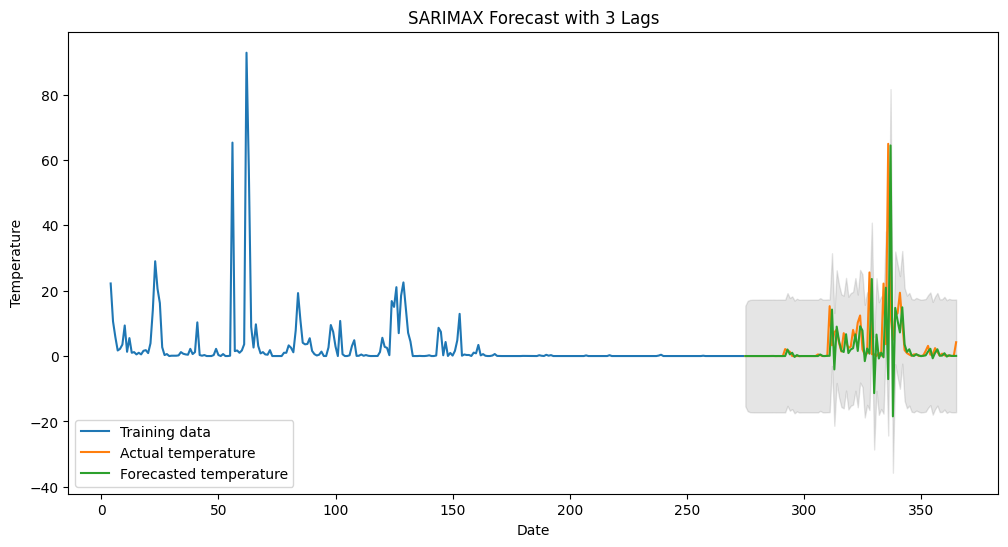

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

temperature_data = pd.read_csv('temp.csv')

# Create lagged features
temperature_data['lag1'] = temperature_data['temperature'].shift(1)
temperature_data['lag2'] = temperature_data['temperature'].shift(2)
temperature_data['lag3'] = temperature_data['temperature'].shift(3)
temperature_data['lag4'] = temperature_data['temperature'].shift(4)

# Drop NaN values resulting from lagging
temperature_data = temperature_data.dropna()

# Split data into train and test sets
train, test = train_test_split(temperature_data, shuffle=False)

# Define and fit the SARIMAX model
model = SARIMAX(train['temperature'], exog=train[['lag1','lag2','lag3','lag4']], order=(1, 0, 0), seasonal_order=(0, 0, 0, 0))
results = model.fit()

# Forecast using the model
forecast = results.get_forecast(steps=len(test), exog=test[['lag1','lag2','lag3','lag4']])
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['temperature'], label='Training data')
plt.plot(test.index, test['temperature'], label='Actual temperature')
plt.plot(test.index, forecast_mean, label='Forecasted temperature')
plt.fill_between(test.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=0.1)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('SARIMAX Forecast with 3 Lags')
plt.legend()
plt.show()

In [3]:
xyz

NameError: name 'xyz' is not defined

# lstm

Epoch 1/50


/home/nishanth/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3095
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1394 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0319 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0234 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0188 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0159 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0163 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0167 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0144 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0153 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0146 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0160 
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0151 
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0138 
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0139 
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

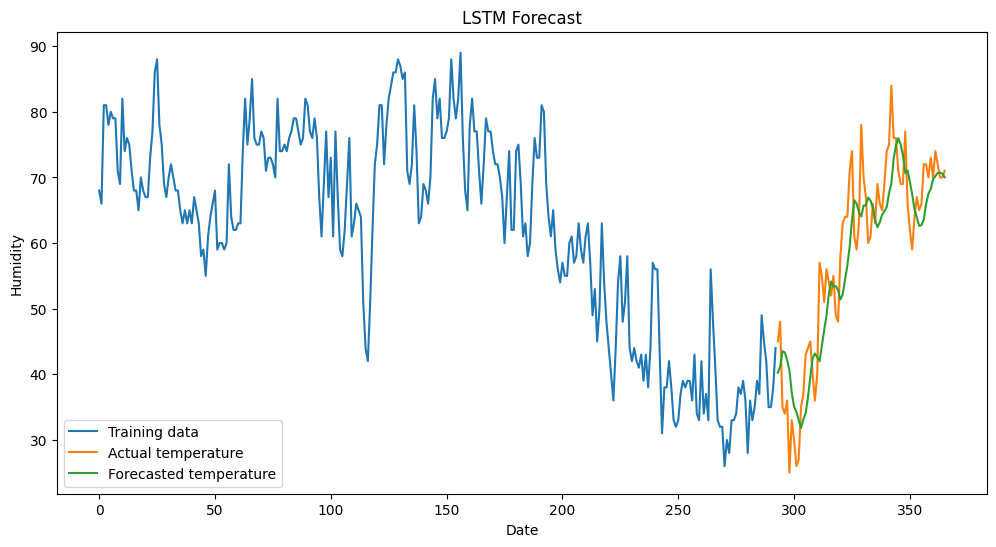

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import LSTM, Dense # type: ignore
from sklearn.metrics import mean_squared_error

# Load temperature data
temperature_data = pd.read_csv('temp.csv', parse_dates=True)
temperature_data = temperature_data.dropna()

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(temperature_data['temperature'].values.reshape(-1, 1))

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Define sequence length and split data
sequence_length = 5  # Adjust as needed
X, y = create_sequences(scaled_data, sequence_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape data for LSTM input: [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

# Fit model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predictions
y_pred = model.predict(X_test)

# Inverse transform predictions to original scale
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(temperature_data.index[:-len(y_test)], temperature_data['temperature'][:-len(y_test)], label='Training data')
plt.plot(temperature_data.index[-len(y_test):], temperature_data['temperature'][-len(y_test):], label='Actual temperature')
plt.plot(temperature_data.index[-len(y_test):], y_pred_inv, label='Forecasted temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('LSTM Forecast')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

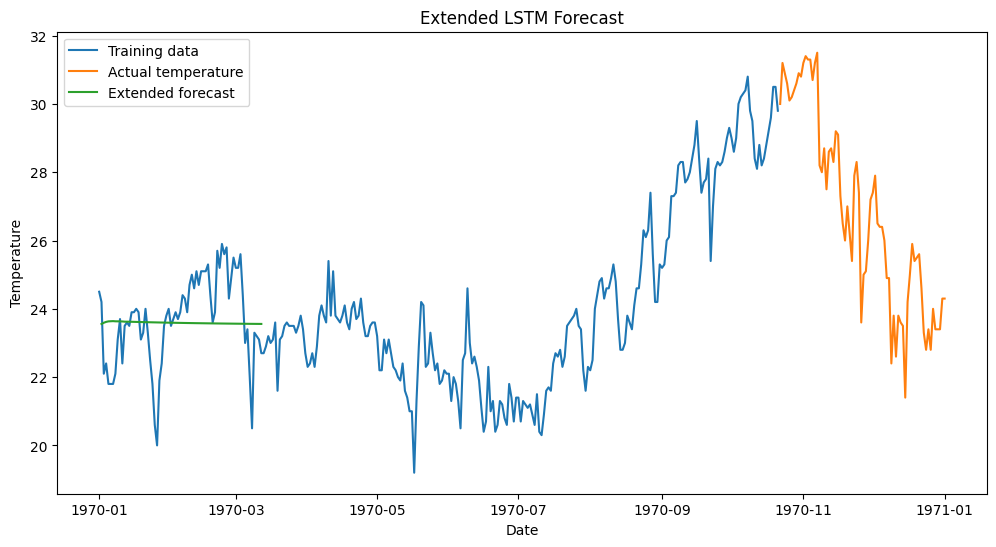

In [ ]:
# Extend forecasting by 70 days
forecast_period = 70
extended_forecast = []

# Use last sequence_length days from test data to start forecasting
current_sequence = X_test[-1]

for i in range(forecast_period):
    # Reshape current sequence for LSTM input: [samples, time steps, features]
    current_sequence = current_sequence.reshape((1, sequence_length, 1))
    
    # Predict next temperature
    next_pred = model.predict(current_sequence)
    
    # Append prediction to forecast
    extended_forecast.append(next_pred[0, 0])
    
    # Update current sequence to include new prediction and drop the first value
    current_sequence = np.roll(current_sequence, -1, axis=1)
    current_sequence[0, -1] = next_pred

# Inverse transform extended forecast predictions to original scale
extended_forecast_inv = scaler.inverse_transform(np.array(extended_forecast).reshape(-1, 1))

# Plotting extended forecast
plt.figure(figsize=(12, 6))
plt.plot(temperature_data.index[:-len(y_test)], temperature_data['temperature'][:-len(y_test)], label='Training data')
plt.plot(temperature_data.index[-len(y_test):], temperature_data['temperature'][-len(y_test):], label='Actual temperature')
plt.plot(pd.date_range(start=temperature_data.index[-1], periods=forecast_period+1, freq='D')[1:], extended_forecast_inv, label='Extended forecast')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Extended LSTM Forecast')
plt.legend()
plt.show()

# lstm for forecasting

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


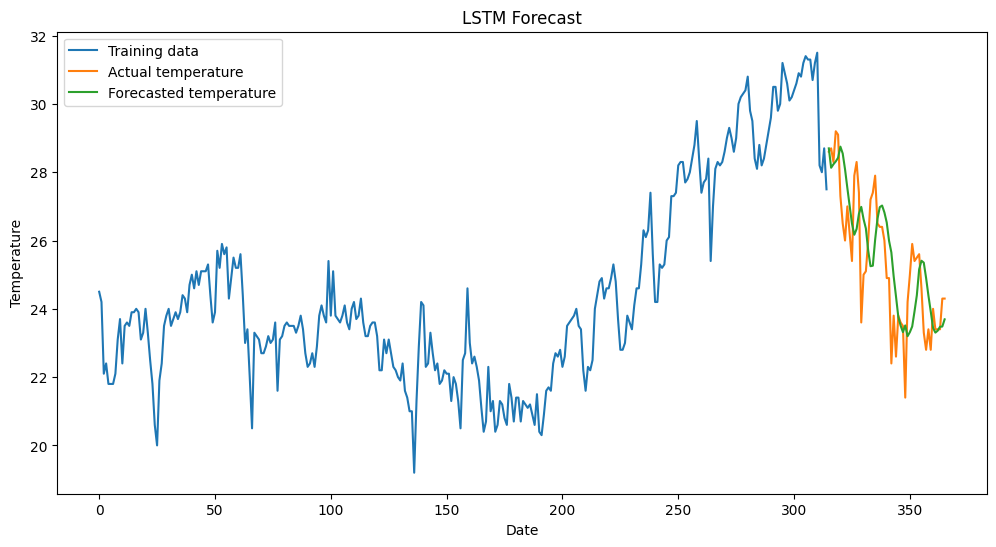

In [ ]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.preprocessing import MinMaxScaler # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import LSTM, Dense, Input # type: ignore
from sklearn.metrics import mean_squared_error # type: ignore
from sklearn.model_selection import train_test_split # type: ignore

# Load temperature data
data = pd.read_csv('1_year_daily_weather_data.csv', parse_dates=True)
temperature_data = data.dropna()

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(temperature_data['temperature'].values.reshape(-1, 1))

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Define sequence length and split data
sequence_length = 5  # Adjust as needed
X, y = create_sequences(scaled_data, sequence_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)

# Reshape data for LSTM input: [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(Input(shape=(sequence_length, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Predictions
y_pred = model.predict(X_test)

# Inverse transform predictions to original scale
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(temperature_data.index[:-len(y_test)], temperature_data['temperature'][:-len(y_test)], label='Training data')
plt.plot(temperature_data.index[-len(y_test):], temperature_data['temperature'][-len(y_test):], label='Actual temperature')
plt.plot(temperature_data.index[-len(y_test):], y_pred_inv, label='Forecasted temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('LSTM Forecast')
plt.legend()
plt.show()

In [ ]:
print(len(predictions))

50


Epoch 1/20


/home/nishanth/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


305/305 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0219
Epoch 2/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0090
Epoch 3/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0083
Epoch 4/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0083
Epoch 5/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0071
Epoch 6/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0082
Epoch 7/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0057
Epoch 8/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0056
Epoch 9/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0050
Epoch 10/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0050
Epoch 11/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0044
Epoch 12/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0042
Epoch 13/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0039
Epoch 14/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0036
Epoch 15/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0054


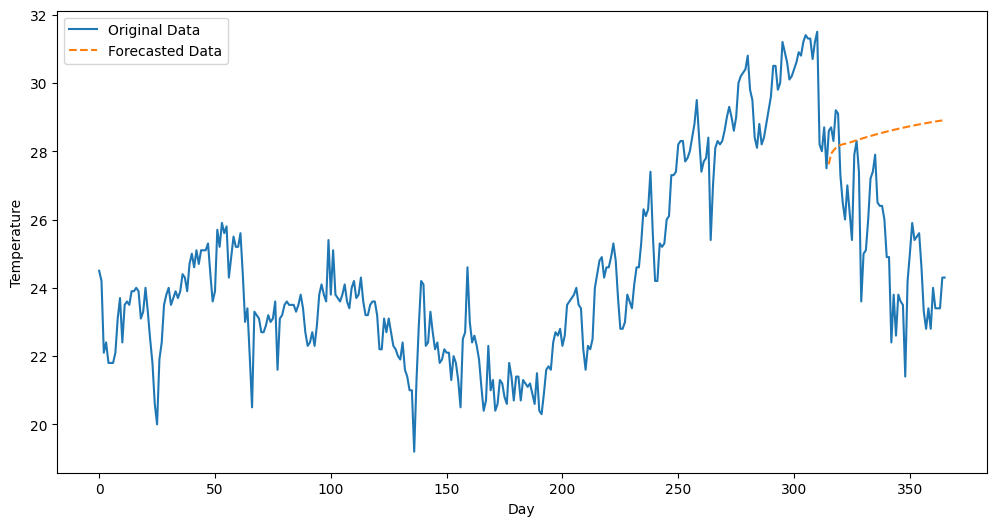

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
# Load temperature data
data = pd.read_csv('1_year_daily_weather_data.csv', parse_dates=True)
data = data.dropna()
data = data['temperature']

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.values.reshape(-1, 1))

# Split the data
train_data = data[:315]
test_data = data[315:]

# Create a function to convert the data into sequences
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 10  # Length of the sequences

# Create sequences for training
X_train, y_train = create_sequences(train_data, seq_length)

# Reshape the data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1)

# Forecasting the next 50 values
predictions = []
current_input = train_data[-seq_length:]  # Start with the last sequence from the training set

for i in range(50):
    current_input = current_input.reshape((1, seq_length, 1))
    next_value = model.predict(current_input)
    predictions.append(next_value[0, 0])
    current_input = np.append(current_input[:, 1:, :], next_value.reshape(1, 1, 1), axis=1)

# Inverse transform the predictions to original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Inverse transform the train data to original scale for plotting
train_data_plot = scaler.inverse_transform(train_data)

# Prepare the data for plotting
original_data = np.concatenate((train_data_plot, scaler.inverse_transform(test_data)), axis=0)
forecasted_data = np.concatenate((train_data_plot, predictions), axis=0)

# Plot the original and forecasted data
plt.figure(figsize=(12, 6))
plt.plot(original_data, label='Original Data')
plt.plot(range(315, 315 + len(predictions)), predictions, label='Forecasted Data', linestyle='--')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━

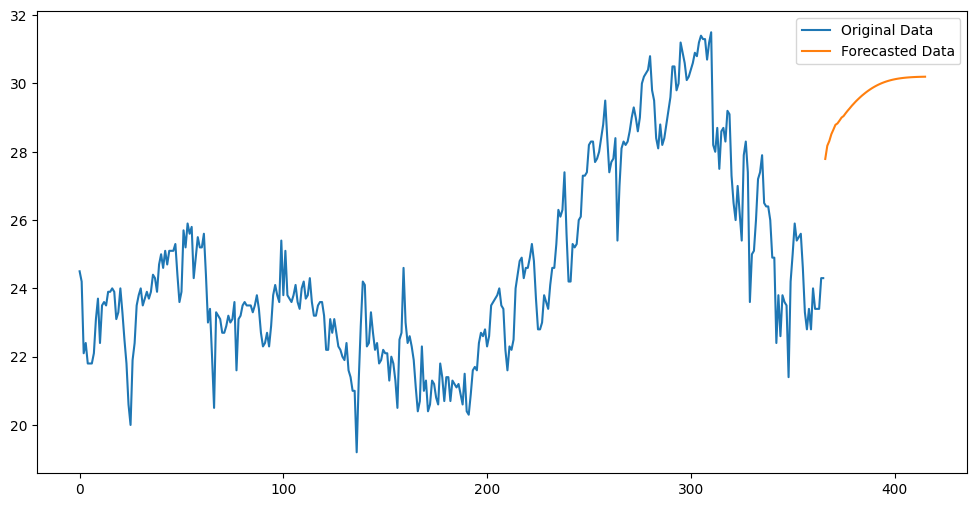

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

data = pd.read_csv('1_year_daily_weather_data.csv', parse_dates=True)
data = data.dropna()
data = data['temperature']

scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.values.reshape(-1, 1))

# Split the data
train_data = data[:315]
test_data = data[315:]

# Create a function to convert the data into sequences
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 10  # Length of the sequences

# Create sequences for training
X_train, y_train = create_sequences(train_data, seq_length)

# Reshape the data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(Input(shape=(seq_length, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=0)

# Forecasting the next 50 values
predictions = []
current_input = train_data[-seq_length:]  # Start with the last sequence from the training set

for i in range(50):
    current_input = current_input.reshape((1, seq_length, 1))
    next_value = model.predict(current_input)
    predictions.append(next_value[0, 0])
    current_input = np.append(current_input[:, 1:, :], next_value.reshape(1, 1, 1), axis=1)

# Inverse transform the predictions to original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(np.arange(366), scaler.inverse_transform(data), label='Original Data')
plt.plot(np.arange(366, 366 + 50), predictions, label='Forecasted Data')
plt.legend()
plt.show()

# forecasting using linear regression

In [1]:
import pandas as pd
df = pd.read_csv('1_year_daily_weather_data.csv')
df

,date,temperature,rainfall,humidity
0,2023-07-01,24.5,0.20,68
1,2023-07-02,24.2,9.20,66
2,2023-07-03,22.1,5.80,81
3,2023-07-04,22.4,19.40,81
4,2023-07-05,21.8,22.20,78
...,...,...,...,...
361,2024-06-26,23.4,0.16,74
362,2024-06-27,23.4,0.09,72
363,2024-06-28,23.4,0.04,70
364,2024-06-29,24.3,0.05,70


In [2]:
temperature_data = df['temperature']
temperature_data

0      24.5
1      24.2
2      22.1
3      22.4
4      21.8
       ... 
361    23.4
362    23.4
363    23.4
364    24.3
365    24.3
Name: temperature, Length: 366, dtype: float64

In [3]:
import numpy as np
temperature_data = np.array(temperature_data)
temperature_data

array([24.5, 24.2, 22.1, 22.4, 21.8, 21.8, 21.8, 22.1, 23.1, 23.7, 22.4,
       23.5, 23.6, 23.5, 23.9, 23.9, 24. , 23.9, 23.1, 23.3, 24. , 23.3,
       22.5, 21.8, 20.6, 20. , 21.9, 22.4, 23.5, 23.8, 24. , 23.5, 23.7,
       23.9, 23.7, 23.9, 24.4, 24.3, 23.9, 24.7, 25. , 24.6, 25.1, 24.7,
       25.1, 25.1, 25.1, 25.3, 24.4, 23.6, 23.9, 25.7, 25.2, 25.9, 25.6,
       25.8, 24.3, 24.9, 25.5, 25.2, 25.2, 25.6, 24.4, 23. , 23.4, 22. ,
       20.5, 23.3, 23.2, 23.1, 22.7, 22.7, 22.9, 23.2, 23. , 23.1, 23.6,
       21.6, 23.1, 23.2, 23.5, 23.6, 23.5, 23.5, 23.5, 23.3, 23.5, 23.8,
       23.4, 22.7, 22.3, 22.4, 22.7, 22.3, 22.9, 23.8, 24.1, 23.8, 23.6,
       25.4, 23.8, 25.1, 23.8, 23.7, 23.6, 23.8, 24.1, 23.6, 23.4, 24. ,
       24.2, 23.7, 23.8, 24.3, 23.6, 23.2, 23.2, 23.5, 23.6, 23.6, 23.2,
       22.2, 22.2, 23.1, 22.7, 23.1, 22.7, 22.3, 22.2, 22. , 21.9, 22.4,
       21.6, 21.4, 21. , 21. , 19.2, 21.3, 22.9, 24.2, 24.1, 22.3, 22.4,
       23.3, 22.7, 22.2, 22.4, 21.8, 21.9, 22.2, 22

In [4]:
len(temperature_data)

366

In [5]:
temperature_data.shape

(366,)

In [6]:
def create_sequences(data, seq_length = 5):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)

In [7]:
X, y = create_sequences(temperature_data)
display(X)
display(y)

array([[24.5, 24.2, 22.1, 22.4, 21.8],
       [24.2, 22.1, 22.4, 21.8, 21.8],
       [22.1, 22.4, 21.8, 21.8, 21.8],
       ...,
       [23.4, 22.8, 24. , 23.4, 23.4],
       [22.8, 24. , 23.4, 23.4, 23.4],
       [24. , 23.4, 23.4, 23.4, 24.3]])

array([21.8, 21.8, 22.1, 23.1, 23.7, 22.4, 23.5, 23.6, 23.5, 23.9, 23.9,
       24. , 23.9, 23.1, 23.3, 24. , 23.3, 22.5, 21.8, 20.6, 20. , 21.9,
       22.4, 23.5, 23.8, 24. , 23.5, 23.7, 23.9, 23.7, 23.9, 24.4, 24.3,
       23.9, 24.7, 25. , 24.6, 25.1, 24.7, 25.1, 25.1, 25.1, 25.3, 24.4,
       23.6, 23.9, 25.7, 25.2, 25.9, 25.6, 25.8, 24.3, 24.9, 25.5, 25.2,
       25.2, 25.6, 24.4, 23. , 23.4, 22. , 20.5, 23.3, 23.2, 23.1, 22.7,
       22.7, 22.9, 23.2, 23. , 23.1, 23.6, 21.6, 23.1, 23.2, 23.5, 23.6,
       23.5, 23.5, 23.5, 23.3, 23.5, 23.8, 23.4, 22.7, 22.3, 22.4, 22.7,
       22.3, 22.9, 23.8, 24.1, 23.8, 23.6, 25.4, 23.8, 25.1, 23.8, 23.7,
       23.6, 23.8, 24.1, 23.6, 23.4, 24. , 24.2, 23.7, 23.8, 24.3, 23.6,
       23.2, 23.2, 23.5, 23.6, 23.6, 23.2, 22.2, 22.2, 23.1, 22.7, 23.1,
       22.7, 22.3, 22.2, 22. , 21.9, 22.4, 21.6, 21.4, 21. , 21. , 19.2,
       21.3, 22.9, 24.2, 24.1, 22.3, 22.4, 23.3, 22.7, 22.2, 22.4, 21.8,
       21.9, 22.2, 22.1, 22.1, 21.3, 22. , 21.8, 21

In [8]:
display(X.shape)
display(y.shape)

(361, 5)

(361,)

In [9]:
df = pd.DataFrame(X, columns=['lag1', 'lag2', 'lag3', 'lag4', 'lag5'])
df

,lag1,lag2,lag3,lag4,lag5
0,24.5,24.2,22.1,22.4,21.8
1,24.2,22.1,22.4,21.8,21.8
2,22.1,22.4,21.8,21.8,21.8
3,22.4,21.8,21.8,21.8,22.1
4,21.8,21.8,21.8,22.1,23.1
...,...,...,...,...,...
356,23.3,22.8,23.4,22.8,24.0
357,22.8,23.4,22.8,24.0,23.4
358,23.4,22.8,24.0,23.4,23.4
359,22.8,24.0,23.4,23.4,23.4


In [10]:
df['target'] = y
df

,lag1,lag2,lag3,lag4,lag5,target
0,24.5,24.2,22.1,22.4,21.8,21.8
1,24.2,22.1,22.4,21.8,21.8,21.8
2,22.1,22.4,21.8,21.8,21.8,22.1
3,22.4,21.8,21.8,21.8,22.1,23.1
4,21.8,21.8,21.8,22.1,23.1,23.7
...,...,...,...,...,...,...
356,23.3,22.8,23.4,22.8,24.0,23.4
357,22.8,23.4,22.8,24.0,23.4,23.4
358,23.4,22.8,24.0,23.4,23.4,23.4
359,22.8,24.0,23.4,23.4,23.4,24.3


In [11]:
df.to_csv('temp_data_with_lags.csv', index=False)

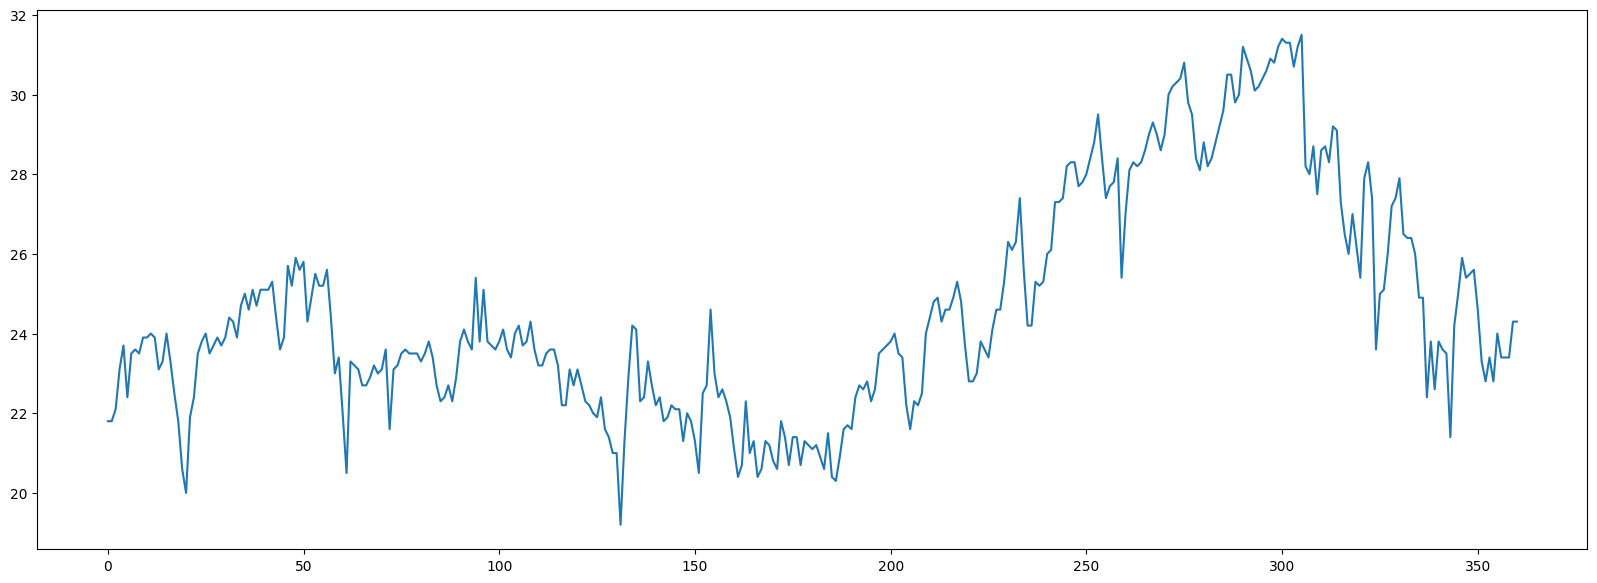

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 7))
plt.plot(df['target'])
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
X_test

array([[28.6, 29. , 29.3, 29. , 28.6],
       [29. , 29.3, 29. , 28.6, 29. ],
       [29.3, 29. , 28.6, 29. , 30. ],
       [29. , 28.6, 29. , 30. , 30.2],
       [28.6, 29. , 30. , 30.2, 30.3],
       [29. , 30. , 30.2, 30.3, 30.4],
       [30. , 30.2, 30.3, 30.4, 30.8],
       [30.2, 30.3, 30.4, 30.8, 29.8],
       [30.3, 30.4, 30.8, 29.8, 29.5],
       [30.4, 30.8, 29.8, 29.5, 28.4],
       [30.8, 29.8, 29.5, 28.4, 28.1],
       [29.8, 29.5, 28.4, 28.1, 28.8],
       [29.5, 28.4, 28.1, 28.8, 28.2],
       [28.4, 28.1, 28.8, 28.2, 28.4],
       [28.1, 28.8, 28.2, 28.4, 28.8],
       [28.8, 28.2, 28.4, 28.8, 29.2],
       [28.2, 28.4, 28.8, 29.2, 29.6],
       [28.4, 28.8, 29.2, 29.6, 30.5],
       [28.8, 29.2, 29.6, 30.5, 30.5],
       [29.2, 29.6, 30.5, 30.5, 29.8],
       [29.6, 30.5, 30.5, 29.8, 30. ],
       [30.5, 30.5, 29.8, 30. , 31.2],
       [30.5, 29.8, 30. , 31.2, 30.9],
       [29.8, 30. , 31.2, 30.9, 30.6],
       [30. , 31.2, 30.9, 30.6, 30.1],
       [31.2, 30.9, 30.6,

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [15]:
y_pred = model.predict(X)
y_pred

array([22.07740021, 22.01440618, 21.92679186, 22.17013426, 22.99605053,
       23.5234291 , 22.49342863, 23.48537789, 23.55747929, 23.50965764,
       23.84557329, 23.88002276, 23.98538472, 23.91113846, 23.25400927,
       23.41576896, 23.96468757, 23.36109237, 22.70103968, 22.0976586 ,
       21.0397452 , 20.4431641 , 21.93084361, 22.27221277, 23.24630463,
       23.57298136, 23.87620744, 23.52191032, 23.74178301, 23.90076146,
       23.73443209, 23.903102  , 24.32764969, 24.25678293, 23.9455006 ,
       24.63409751, 24.88294392, 24.57409085, 25.02168591, 24.70069621,
       25.05865193, 25.04313858, 25.06724425, 25.23592669, 24.4909895 ,
       23.82200903, 24.02898282, 25.48359267, 25.03536297, 25.7019276 ,
       25.49267444, 25.73675743, 24.46425685, 24.98411984, 25.41112763,
       25.15253913, 25.15459559, 25.51343448, 24.51361413, 23.33838756,
       23.61659404, 22.339831  , 21.00714605, 23.25345273, 23.07484922,
       23.0470087 , 22.74528027, 22.82169903, 22.96290657, 23.20

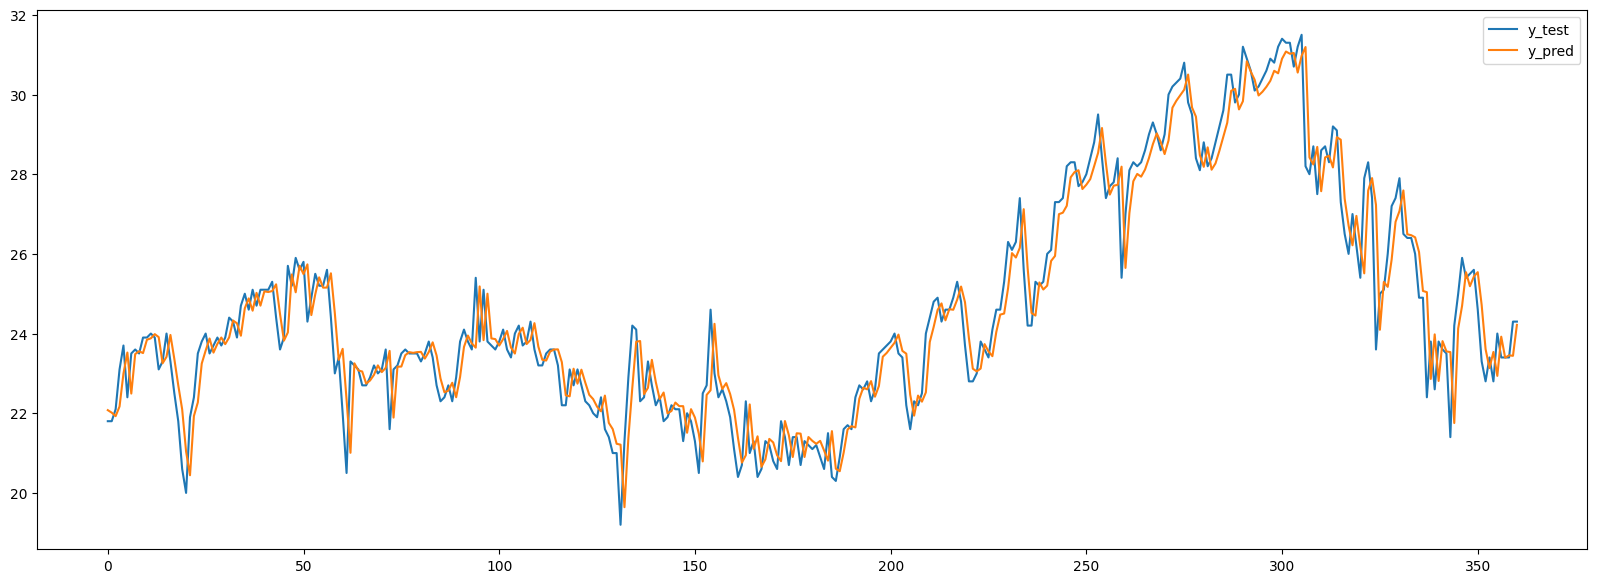

In [16]:
plt.figure(figsize=(20, 7))
plt.plot(y)
plt.plot(y_pred)
plt.legend(['y_test', 'y_pred'])
plt.show()

In [17]:
y_pred = np.append(y_pred, y_pred[0])
y_pred = y_pred[1:]
y_pred

array([22.01440618, 21.92679186, 22.17013426, 22.99605053, 23.5234291 ,
       22.49342863, 23.48537789, 23.55747929, 23.50965764, 23.84557329,
       23.88002276, 23.98538472, 23.91113846, 23.25400927, 23.41576896,
       23.96468757, 23.36109237, 22.70103968, 22.0976586 , 21.0397452 ,
       20.4431641 , 21.93084361, 22.27221277, 23.24630463, 23.57298136,
       23.87620744, 23.52191032, 23.74178301, 23.90076146, 23.73443209,
       23.903102  , 24.32764969, 24.25678293, 23.9455006 , 24.63409751,
       24.88294392, 24.57409085, 25.02168591, 24.70069621, 25.05865193,
       25.04313858, 25.06724425, 25.23592669, 24.4909895 , 23.82200903,
       24.02898282, 25.48359267, 25.03536297, 25.7019276 , 25.49267444,
       25.73675743, 24.46425685, 24.98411984, 25.41112763, 25.15253913,
       25.15459559, 25.51343448, 24.51361413, 23.33838756, 23.61659404,
       22.339831  , 21.00714605, 23.25345273, 23.07484922, 23.0470087 ,
       22.74528027, 22.82169903, 22.96290657, 23.20124767, 23.03

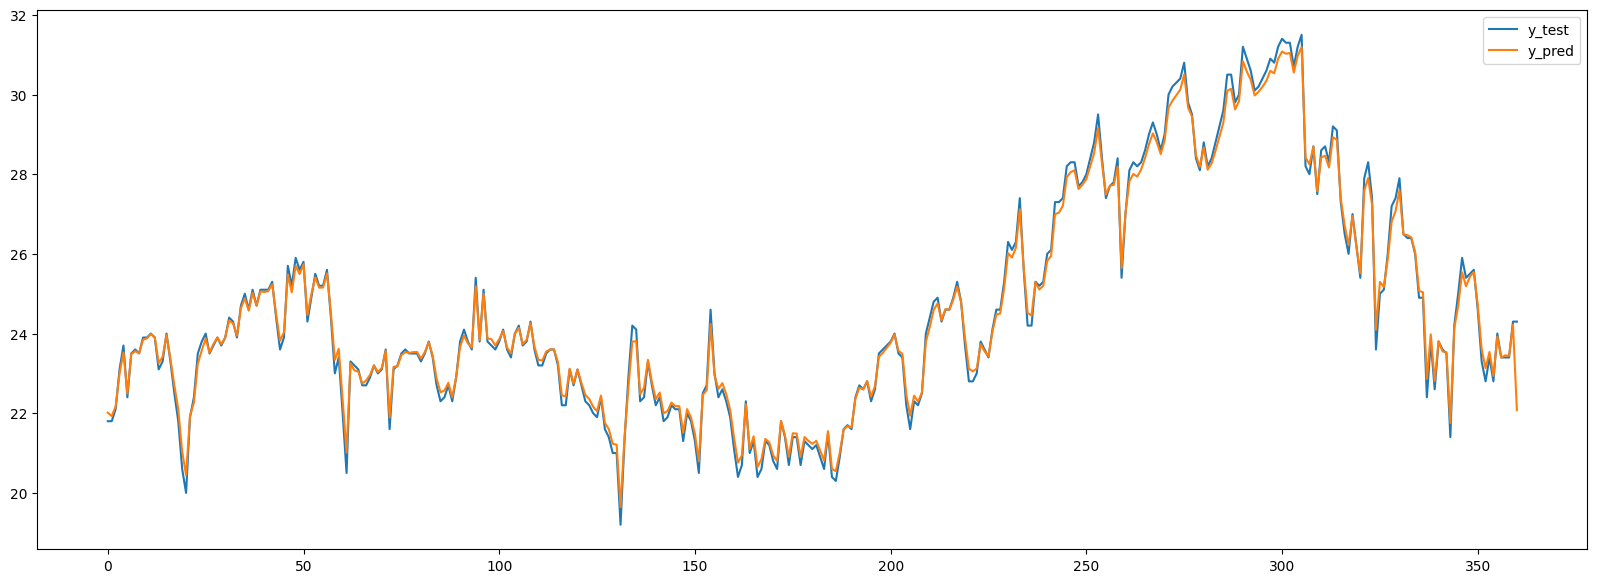

In [18]:
plt.figure(figsize=(20, 7))
plt.plot(y)
plt.plot(y_pred)
plt.legend(['y_test', 'y_pred'])
plt.show()

In [19]:
def forecast(df):
    lag1 = (df['lag2'].iloc[-1])
    lag2 = (df['lag3'].iloc[-1])
    lag3 = (df['lag4'].iloc[-1])
    lag4 = (df['lag5'].iloc[-1])
    lag5 = (df['target'].iloc[-1])
    y_pred = model.predict([[lag1, lag2, lag3, lag4, lag5]])
    new_row = pd.DataFrame({'lag1': [lag1], 'lag2': [lag2], 'lag3': [lag3], 'lag4': [lag4], 'lag5': [lag5], 'target': y_pred})
    df = pd.concat([df, new_row], ignore_index=True)
    return df

In [20]:
for i in range(100):
    df = forecast(df)
df

,lag1,lag2,lag3,lag4,lag5,target
0,24.500000,24.200000,22.100000,22.400000,21.800000,21.800000
1,24.200000,22.100000,22.400000,21.800000,21.800000,21.800000
2,22.100000,22.400000,21.800000,21.800000,21.800000,22.100000
3,22.400000,21.800000,21.800000,21.800000,22.100000,23.100000
4,21.800000,21.800000,21.800000,22.100000,23.100000,23.700000
...,...,...,...,...,...,...
456,24.506805,24.507668,24.508509,24.509326,24.510123,24.510898
457,24.507668,24.508509,24.509326,24.510123,24.510898,24.511652
458,24.508509,24.509326,24.510123,24.510898,24.511652,24.512386
459,24.509326,24.510123,24.510898,24.511652,24.512386,24.513100


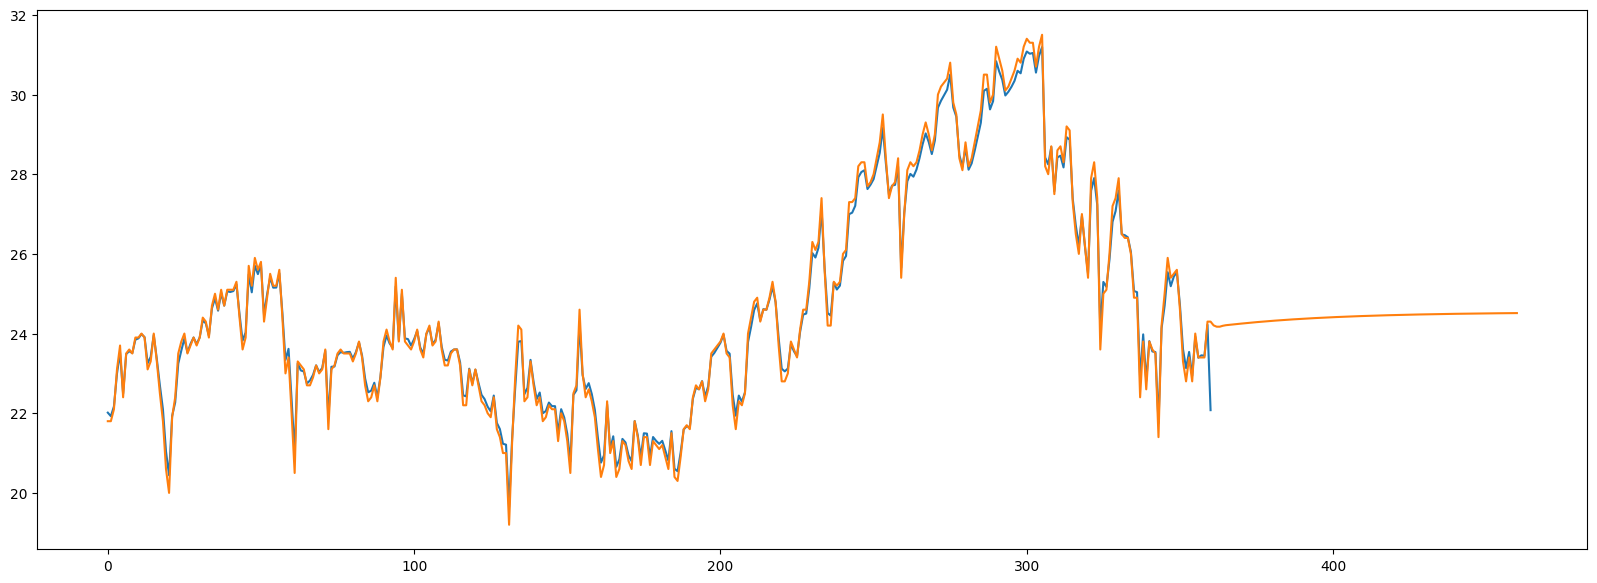

In [21]:
plt.figure(figsize=(20, 7))
plt.plot(y_pred)
plt.plot(df['target'])
plt.show()

In [22]:
xyz

NameError: name 'xyz' is not defined

(272,)

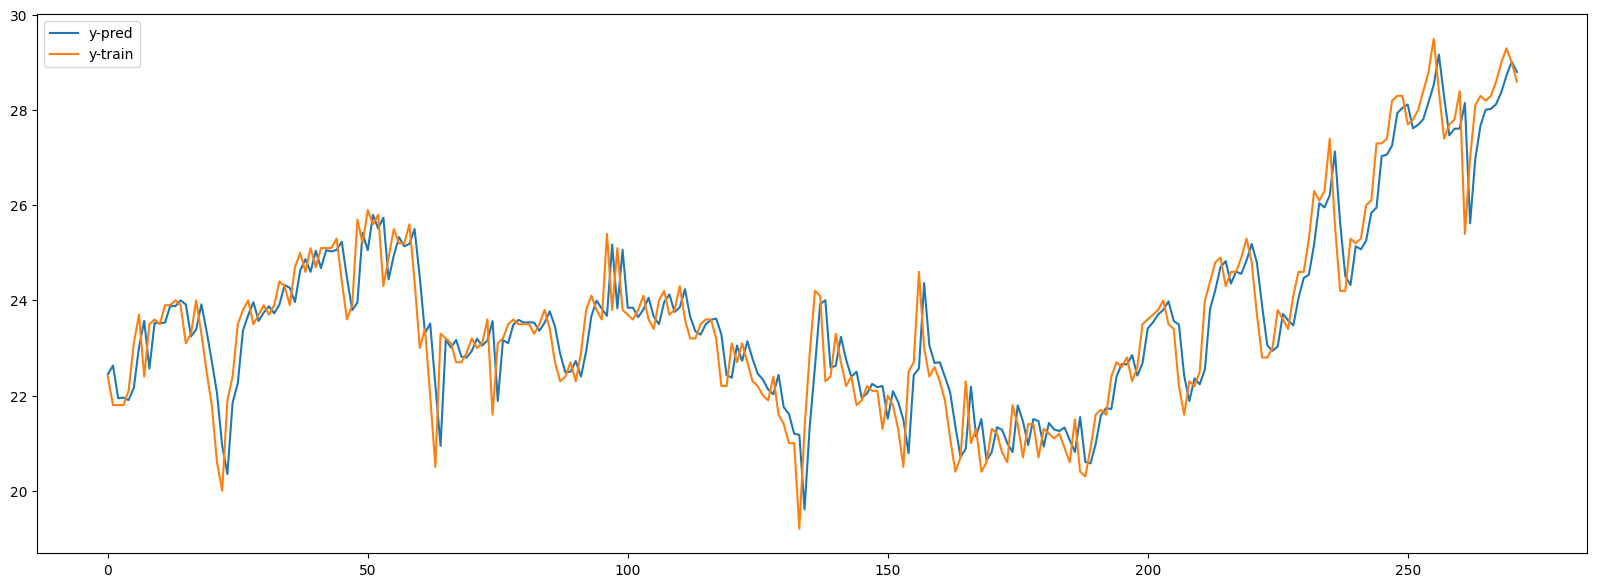

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv('temp_data_with_lags.csv')
# display(df)

X = df.drop(['target'], axis='columns')
y = df['target']
# display(X)
# display(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
# display(X_train.shape)
# display(y_train.shape)
# display(X_test.shape)
# display(y_test.shape)
        
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

# model = Sequential()
# model.add(Input((3, 1)))
# model.add(LSTM(64))
# model.add(Dense(32, 'relu'))
# model.add(Dense(32, 'relu'))
# model.add(Dense(1, 'linear'))
# model.compile(loss='mse', optimizer=Adam(learning_rate=0.0000000001))
# model.fit(X_train, y_train, epochs=10, verbose=0)
# y_pred = model.predict(X_train, verbose=0)

# display(y_pred)
display(y_pred.shape)

plt.figure(figsize=(20, 7))
plt.plot(y_pred)
plt.plot(y_train)
plt.legend(['y-pred', 'y-train'])
plt.show()